# 矩陣與 NumPy（Matrices and NumPy）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 矩陣
一個 $m\times n$ 的**矩陣**  
有 $m$ 個橫排（稱作__列__）  
以及 $n$ 個直排（稱作**行**）  
共有 $mn$ 個數字組成

In [2]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
A

[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]

可以用 `A[i,j]` 來叫出 $A$ 的第 $i,j$-項  
（注意 Sage 裡列和行都是從 0 開始數）

In [5]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
A[1,1]

6

也可以用 `A[list or rows, list of columns]`  
來叫出**子矩陣**

In [6]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
A[[1,2],[1,3]]

[ 6  8]
[10 12]

矩陣的列和行都可以視為一個向量  
分別稱作矩陣的__列向量__和**行向量**  
（程式碼中的 `:` 代表全部的意思）

In [8]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
print("A[2,:] = ")
print(A[2,:])
print("A[:,3] = ")
print(A[:,3])

A[2,:] = 
[ 9 10 11 12]
A[:,3] = 
[ 4]
[ 8]
[12]


### 矩陣運算

#### 矩陣加矩陣
兩個大小一樣的矩陣才能相加  
如果 $A$ 和 $B$ 都是 $m\times n$ 矩陣  
則 $A+B$ 也是一個 $m\times n$ 矩陣  
其每一項都是把 $A$ 和 $B$ 中的相對應項相加得來

In [46]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
B = matrix([
        [12,11,10,9],
        [8,7,6,5],
        [4,3,2,1]
    ])
print("A =")
print(A)
print("B =")
print(B)
print("A + B =")
print(A + B)

A =
[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]
B =
[12 11 10  9]
[ 8  7  6  5]
[ 4  3  2  1]
A + B =
[13 13 13 13]
[13 13 13 13]
[13 13 13 13]


#### 純量乘矩陣
一個純量 $k$ 可以和任一個 $m\times n$ 矩陣 $A$ 相乘  
所得的矩陣 $kA$ 也是一個 $m\times n$ 矩陣  
其每一項都是把 $A$ 的相對應項乘 $k$ 得來

In [47]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
k = 2
print("A =")
print(A)
print("k = %s"%k)
print("kA =")
print(k * A)

A =
[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]
k = 2
kA =
[ 2  4  6  8]
[10 12 14 16]
[18 20 22 24]


#### 矩陣乘向量（內積觀點）
一個 $m\times n$ 的矩陣 $A$ 可以和一個長度為 $n$ 的向量 ${\bf v}$ 相乘  
所得的結果 $A{\bf v}$ 是一個長度為 $m$ 的向量  
$({\bf v}\cdot{\bf r}_0, \ldots, {\bf v}\cdot{\bf r}_0)$  
其中 ${\bf r}_0, \ldots, {\bf r}_{n-1}$ 為 $A$ 的列向量

In [48]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
v = matrix([
        [1], 
        [1], 
        [1], 
        [1]
    ])
print("A =")
print(A)
print("v =")
print(v)
print("Av =")
print(A * v)

A =
[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]
v =
[1]
[1]
[1]
[1]
Av =
[10]
[26]
[42]


矩陣的其中一個由來是為了記錄線性方程式  
比如說  
$\begin{aligned}
x + 2y + 3z + 4w &= 10 \\
5x + 6y + 7z + 8w &= 26 \\
9x + 10y + 11z + 12w &= 42
\end{aligned}$  
就可以簡寫成  
$\begin{bmatrix}
 1 & 2 & 3 & 4 \\
 5 & 6 & 7 & 8 \\
 9 & 10 & 11 & 12 
\end{bmatrix}
\begin{bmatrix}
 x \\ y \\ z \\ w
\end{bmatrix}
=
\begin{bmatrix}
 10 \\ 26 \\ 42
\end{bmatrix}$

矩陣也包含很多幾何意義  
想像 ${\bf v}$ 是一個超平面的法向量  
則 $A{\bf v}$ 的每一項可以告訴我們 $A$ 的列是不是和 ${\bf v}$ 在同一側  
${\bf v}\cdot{\bf r}_i > 0$：${\bf r}_i$ 和 ${\bf v}$ 在超平面的同一側  
${\bf v}\cdot{\bf r}_i = 0$：${\bf r}_i$ 在超平面上  
${\bf v}\cdot{\bf r}_i < 0$：${\bf r}_i$ 和 ${\bf v}$ 在超平面的另一側  

#### 矩陣乘向量（線性組合觀點）
一個 $m\times n$ 的矩陣 $A$ 可以和一個長度為 $n$ 的向量 ${\bf v}$ 相乘  
所得的結果 $A{\bf v}$ 是一個長度為 $m$ 的向量  
$b_0{\bf c}_0 + \cdots + b_{n-1}{\bf c}_{n-1}$  
其中 ${\bf v} = (b_0, \ldots, b_{n-1})$  
而 ${\bf c}_0, \ldots, {\bf c}_{n-1}$ 為 $A$ 的行向量

In [49]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
v = matrix([
        [1], 
        [1], 
        [1], 
        [1]
    ])
print("A =")
print(A)
print("v =")
print(v)
print("Av =")
print(A * v)

A =
[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]
v =
[1]
[1]
[1]
[1]
Av =
[10]
[26]
[42]


令 ${\bf e}_0 = (1,0,0,\ldots,0)$  
${\bf e}_1 = (0,1,0,\ldots,0)$ 等等  
則可以看出 $A{\bf e}_i = {\bf c}_i$

In [50]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
i = 2
ei = matrix([
        [0],
        [0],
        [0],
        [0]
    ])
ei[i,0] = 1
print("ei =")
print(ei)
print("A ei =")
print(A * ei)

ei =
[0]
[0]
[1]
[0]
A ei =
[ 3]
[ 7]
[11]


#### 旋轉矩陣
固定一個角度 $\theta$  
二維向量 ${\bf e}_0$ 逆時針旋轉 $\theta$ 以後會是 $(\cos\theta,\sin\theta)^\top$  
二維向量 ${\bf e}_1$ 逆時針旋轉 $\theta$ 以後會是 $(-\sin\theta,\cos\theta)^\top$

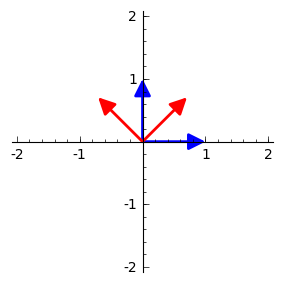

In [29]:
theta = pi/4
e0 = vector([1,0])
e1 = vector([0,1])
new_e0 = vector([cos(theta), sin(theta)])
new_e1 = vector([-sin(theta), cos(theta)])
pic = e0.plot() + e1.plot() + new_e0.plot(color='red') + new_e1.plot(color='red')
pic.show(xmin=-2, xmax=2, ymin=-2, ymax=2, figsize=(3,3))

如果要用一個矩陣 $A$ 來代表旋轉  
也就是 $A{\bf v}$ 是把 ${\bf v}$ 逆時針旋轉 $\theta$  

則 $A$ 必須符合  
$A{\bf e}_0 = (\cos\theta,\sin\theta)^\top$  
$A{\bf e}_1 = (-\sin\theta,\cos\theta)^\top$

唯一的可能就是  
$A = \begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}$

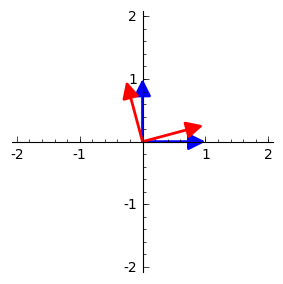

In [36]:
theta = 15 * (pi/180) ### 15 degree
e0 = vector([1,0])
e1 = vector([0,1])
A = matrix([
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)]
    ])
new_e0 = A*e0
new_e1 = A*e1
pic = e0.plot() + e1.plot() + new_e0.plot(color='red') + new_e1.plot(color='red')
pic.show(xmin=-2, xmax=2, ymin=-2, ymax=2, figsize=(3,3))

#### 矩陣乘矩陣
一個 $m\times n$ 的矩陣 $A$  
可以和一個 $n\times\ell$ 的矩陣 $B$ 相乘  
所得的結果 $AB$ 為一個 $m\times\ell$ 的矩陣  
$AB$ 矩陣中的第 $j$ 個行  
是由 $A$ 乘上 $B$ 中的第 $j$ 個行得來

In [51]:
A = matrix([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
B = matrix([
        [1,2],
        [1,2],
        [1,2],
        [1,2]
    ])
print("A =")
print(A)
print("B =")
print(B)
print("AB =")
print(A * B)

A =
[ 1  2  3  4]
[ 5  6  7  8]
[ 9 10 11 12]
B =
[1 2]
[1 2]
[1 2]
[1 2]
AB =
[10 20]
[26 52]
[42 84]


## NumPy
`matrix` 函數是 Sage 裡定義的  
適合代數運算（保留分數、根號等結構）  
一般的 Python 中也可以用 NumPy 來處理矩陣  
較適合數值運算（用小數運算；快速、但會有誤差）

用  
```Python
import numpy as np
```
來讀入 NumPy 套件

In [41]:
import numpy as np
np.__version__

'1.13.3'

在 NumPy 中的一個矩陣  
就是一個二維的**陣列**

In [ ]:
A = np.array([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
A

同樣地  
相同大小的陣列可以相加  
純量也可以和陣列相乘  

In [45]:
A = np.array([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
B = np.array([
        [12,11,10,9],
        [8,7,6,5],
        [4,3,2,1]
    ])
k = 2
print("A + B =")
print(A + B)
print("kA =")
print(k * A)

A + B =
[[13 13 13 13]
 [13 13 13 13]
 [13 13 13 13]]
kA =
[[ 2  4  6  8]
 [10 12 14 16]
 [18 20 22 24]]


但在 NumPy 中預設的乘法是逐項相乘  
大小相同的陣列 $A$ 和陣列 $B$  
可以相乘  
其結果為將 $A$ 和 $B$ 的相對應項相乘得來

In [54]:
A = np.array([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
B = np.array([
        [12,11,10,9],
        [8,7,6,5],
        [4,3,2,1]
    ])
print("A * B (entrywise product) =")
print(A * B)

A * B (entrywise product) =
[[12 22 30 36]
 [40 42 42 40]
 [36 30 22 12]]


若要運算數學中的矩陣乘法  
可以用 `np.dot(A, B)`

In [55]:
A = np.array([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
B = np.array([
        [1,2],
        [1,2],
        [1,2],
        [1,2]
    ])
print("A * B (matrix product) =")
print(np.dot(A, B))

A * B (matrix product) =
[[10 20]
 [26 52]
 [42 84]]


In [56]:
A = np.array([
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ])
v = np.array([1,1,1,1])
print("A * v (matrix-vector product) =")
print(np.dot(A, v))

A * v (matrix-vector product) =
[10 26 42]


### 向量化運算（vectorization）
NumPy 的優勢是它的速度  

若將一些大量的運算  
改寫成矩陣、向量的運算  
再利用 NumPy（或是 MATLAB 等高效演算來）來加速  
則稱為**向量化運算**

若一維陣列 `a` 裡有很多數字  
然要將所有數字相加  
可以使用迴圈

In [58]:
a = np.random.randn(1000000)
print(a.shape)
a

(1000000,)


array([-1.35005403, -0.00447513, -1.68813751, ...,  0.40778158,
        1.25642718, -0.48231264])

In [59]:
### with for loop
total = 0
for num in a:
    total += num
total

-988.95266700060188

也可以把 `a` 和一個全一的向量內積  
$(a_1,\ldots, a_n)\cdot(1,\ldots,1) = a_1 + \cdots + a_n$

In [60]:
### basic vectorization
all_ones = np.ones_like(a)
np.dot(a, all_ones)

-988.95266700060188

也可以用 NumPy 裡的內建函數 `np.sum(a)`

In [61]:
### with np.sum
np.sum(a)

-988.95266700064724

在 Jupyter 裡  
可以用 `%%timeit` 來測量計算一個區塊所需的時間  
（這類的特殊函數叫作 magic method）

In [62]:
%%timeit

### with for loop
total = 0
for num in a:
    total += num
total

10 loops, best of 3: 64.7 ms per loop


In [63]:
%%timeit

### basic vectorization
all_ones = np.ones_like(a)
np.dot(a, all_ones)

1000 loops, best of 3: 1.69 ms per loop


In [64]:
%%timeit

### with np.sum
np.sum(a)

1000 loops, best of 3: 207 µs per loop


## 動手試試看

##### 練習 1
若 $A_1 = \begin{bmatrix}
14 & 9 \\ 
21 & 16
\end{bmatrix}$ 且 $A_2 = \begin{bmatrix}
3 & 8 \\ 
17 & 42
\end{bmatrix} $。

計算 $8 A_1 + 3 A_2$。

In [1]:
### your answer here

##### 練習 2
若 $A_1 = \begin{bmatrix}
5 & 29 \\ 
13 & 33
\end{bmatrix}$ 且 $A_2 = \begin{bmatrix}
75 & 2 \\ 
23 & 14
\end{bmatrix} $。

1. 計算 $A_1 \circ A_2$（相對應項相乘）。

2. 計算 $A_1 \times A_2$（矩陣相乘）。

In [2]:
### your answer here 

##### 練習 3
在二維平面上有一正三角形，點 A(16,25)、B、C(13,21) 分別是三角形上的三點。

求 B 點座標。  
（提示：旋轉矩陣）

In [3]:
### your answer here

##### 練習 4
定義一個函數 `inverse(A)` 其功能為：  
可以將一個 $2\times2$ 的矩陣 `A` 轉成反矩陣  
（附註：反矩陣的公式為 $\frac{1}{ad-bc} \begin{bmatrix}
d & -b \\ 
-c & a
\end{bmatrix}$）

In [1]:
### your answer here

##### 練習 5
 
若$\begin{bmatrix}
5 & 29 \\ 
13 & 33
\end{bmatrix}\begin{bmatrix}
x & y \\ 
z & w
\end{bmatrix} = \begin{bmatrix}
75 & 2 \\ 
23 & 14
\end{bmatrix}$

利用練習 4 來求$\begin{bmatrix}
x & y \\ 
z & w
\end{bmatrix}$  
(也可用`np.linalg.inv(MATRIX)`來求反矩陣)

In [5]:
### your answer here

##### 練習 6

在三維平面上有一三角形，其三點為 $A(2,9,12)，B(4,5,4)，C(0,12,7)$，  
經過某矩陣變換後，其三點變為 $A'(6,20,18)，B'(17,5,21)，C'(9,23,3)$，  
求其矩陣。

In [ ]:
### your answer here

##### 練習 7

試給出一個含有100000個數字的一維陣列，  
並算出其**奇數項和**減掉__偶數項和__的值。  
（提示：運用向量化運算）

In [ ]:
### your answer here

##### 練習 8

定義一個函數 `prime(n)` 其功能為：  
找出所有在 `n` 以下的質數，並以一維陣列的形式回傳。  
（提示：建一個長度為 `n` 的陣列，將非質數的部分刪掉）

In [ ]:
### your answer here

##### 練習 9

定義一個函數 `is_independent` 其功能為：  
輸入一個 `vectors` 的列表，裡面有 `n` 個向量，且每個向量維度都是 `n`  
判斷這些向量是否線性獨立，若線性獨立就回傳 `True` 否則回傳 `False`  
（提示：行列式值不為0則代表線性獨立）

In [ ]:
### your answer here

##### 練習 10



In [ ]:
### your answer here